# Predicting sales using linear regression

This notebook presents a solution to a regression problem that can be found at: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

This is my first data science project, and I have built this notebook in order to develop my skills, and get myself familiar with the data science pipeline.

The algorithm used is linear regression.

In [2]:
import pandas as pd
import numpy as np

## 1. Importing data and exploring the dataset

In [3]:
raw = pd.read_csv('Documents/Data Science/Datasets/Big Mart Sales Train')

In [4]:
raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
variables = raw.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])

In [7]:
variables.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### 1.1 Recoding variables

We can see that column Item_Fat_Content has diferent values for same categories (reg should be Regular for example). This means that values need to be recoded.

In [8]:
variables = variables.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}});
variables.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [9]:
variables.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
variables.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
variables.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
variables.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [13]:
variables.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 1.2 Recoding variables 2

Since it doesn't make sense for the column Item_Visibility to have values of 0, every 0 is being replaced with nan.

In [14]:
variables = variables.replace({'Item_Visibility' : {0 : np.nan}})
variables.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7997.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.643456,0.050308,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.031403,93.826500,1987.000000,834.247400
50%,12.600000,0.057792,143.012800,1999.000000,1794.331000
75%,16.850000,0.098109,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 2. Imputing missing values

In [15]:
from autoimpute.imputations import SingleImputer

In [16]:
raw.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
imputer = SingleImputer(strategy = {'Item_Weight':'interpolate',
                                      'Item_Visibility':'interpolate',
                                     'Outlet_Size':'categorical'}, seed = 101)

In [18]:
#Joining Item and Outlet identifiers to imputed dataset

imputations = pd.concat([imputer.fit_transform(variables), raw.Item_Identifier, raw.Outlet_Identifier], axis = 1)

### 3. EDA on imputed dataset

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
imputations.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.070340,140.992782,1997.831867,2181.288914
std,4.445074,0.049493,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.000000,0.032405,93.826500,1987.000000,834.247400
50%,12.600000,0.058182,143.012800,1999.000000,1794.331000
75%,16.600000,0.097094,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### 3.1 Using box plots and value counts to determine the way data is distributed

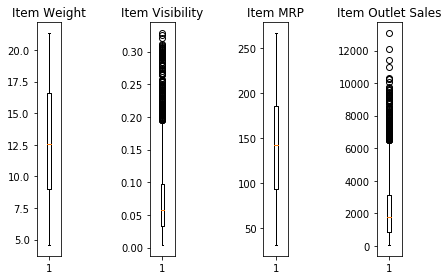

In [21]:
fig, ax = plt.subplots(1, 4)
ax[0].boxplot(imputations.Item_Weight)
ax[0].set_title('Item Weight')
ax[1].boxplot(imputations.Item_Visibility)
ax[1].set_title('Item Visibility')
ax[2].boxplot(imputations.Item_MRP)
ax[2].set_title('Item MRP')
ax[3].boxplot(imputations.Item_Outlet_Sales)
ax[3].set_title('Item Outlet Sales')
plt.tight_layout(w_pad = 5)
plt.show()

In [22]:
imputations.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
imputations.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
imputations.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [25]:
imputations.Outlet_Size.value_counts()

Medium    3908
Small     3328
High      1287
Name: Outlet_Size, dtype: int64

In [26]:
imputations.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [27]:
imputations.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### 3.2 Using scatter plots, Pearson coefficient and chi square test to determine relationships in data

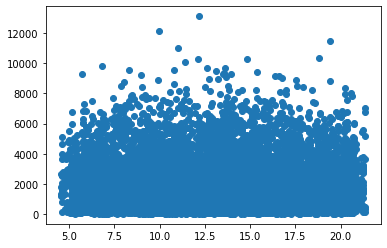

In [28]:
fig, ax = plt.subplots()
ax.scatter(imputations.Item_Weight, imputations.Item_Outlet_Sales)
plt.show()

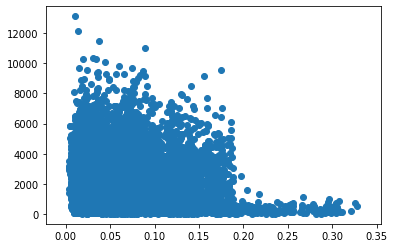

In [29]:
fig, ax = plt.subplots()
ax.scatter(imputations.Item_Visibility, imputations.Item_Outlet_Sales)
plt.show()

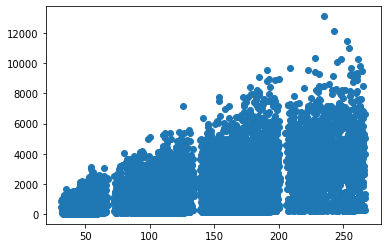

In [30]:
fig, ax = plt.subplots()
ax.scatter(imputations.Item_MRP, imputations.Item_Outlet_Sales)
plt.show()

In [31]:
from scipy import stats

In [32]:
for column in [imputations.Item_Weight, imputations.Item_Visibility, imputations.Item_MRP]:
    print(stats.pearsonr(column, imputations.Item_Outlet_Sales))

(0.014535651743138837, 0.1796586430195305)
(-0.1338737146407038, 2.2124456098525225e-35)
(0.5675744466569193, 0.0)


In [33]:
print(stats.pearsonr(imputations.Item_Weight, imputations.Item_Visibility))
print(stats.pearsonr(imputations.Item_Weight, imputations.Item_MRP))
print(stats.pearsonr(imputations.Item_Visibility, imputations.Item_MRP))

(-0.012096212228161278, 0.2641651688063188)
(0.024839035252139527, 0.021838821746217516)
(-0.006543830539084674, 0.5458137794225415)


In [34]:
print('Chi Square and p-values: ')
print('Item Fat Content and Item Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Fat_Content, imputations.Item_Type))[:2])
print('Item Fat Content and Outlet Size:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Fat_Content, imputations.Outlet_Size))[:2])
print('Item Fat Content and Outlet Location Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Fat_Content, imputations.Outlet_Location_Type))[:2])
print('Item Fat Content and Outlet Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Fat_Content, imputations.Outlet_Type))[:2])
print('Item Type and Outlet Size:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Type, imputations.Outlet_Size))[:2])
print('Item Type and Outlet Location Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Type, imputations.Outlet_Location_Type))[:2])
print('Item Type and Outlet Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Item_Type, imputations.Outlet_Type))[:2])
print('Outlet Size and Outlet Location Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Size, imputations.Outlet_Location_Type))[:2])
print('Outlet Size and Outlet Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Size, imputations.Outlet_Type))[:2])
print('Outlet Location Type and Outlet Type:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Location_Type, imputations.Outlet_Type))[:2])
print('Outlet Location Type and Outlet Establishment Year:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Location_Type, imputations.Outlet_Establishment_Year))[:2])
print('Outlet Type and Outlet Establishment Year:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Type, imputations.Outlet_Establishment_Year))[:2])
print('Outlet Size and Outlet Establishment Year:')
print(stats.chi2_contingency(pd.crosstab(imputations.Outlet_Size, imputations.Outlet_Establishment_Year))[:2])

Chi Square and p-values: 
Item Fat Content and Item Type:
(1509.0010155480727, 0.0)
Item Fat Content and Outlet Size:
(0.13069187251774067, 0.9367433538286681)
Item Fat Content and Outlet Location Type:
(0.12278491613950032, 0.9404540785482409)
Item Fat Content and Outlet Type:
(0.09915238514682442, 0.9919389464641075)
Item Type and Outlet Size:
(8.660427949231066, 0.9999516495979006)
Item Type and Outlet Location Type:
(13.325444358497318, 0.9963035075844918)
Item Type and Outlet Type:
(21.358383347922537, 0.9989342767300661)
Outlet Size and Outlet Location Type:
(2776.001554673845, 0.0)
Outlet Size and Outlet Type:
(3072.2675321953157, 0.0)
Outlet Location Type and Outlet Type:
(4725.606588766826, 0.0)
Outlet Location Type and Outlet Establishment Year:
(14983.114562149767, 0.0)
Outlet Type and Outlet Establishment Year:
(19837.414304459206, 0.0)
Outlet Size and Outlet Establishment Year:
(10670.347451793335, 0.0)


#### 3.3 Setting border for outliers in target variable

In [35]:
np.percentile(imputations.Item_Outlet_Sales, 75) + 1.5*stats.iqr(imputations.Item_Outlet_Sales)

6501.8699

In [36]:
outliers = imputations['Item_Outlet_Sales'] > 6501.8699

### 4. Feature engineering

1. Making dummy variables for categorical data
2. Making the inverse of Item_Visibility column because the scatter plot for this column resembles an inverse function
3. Using Outlet_Establishment_Year column to create a column that represents the number of years an outlet has been open for. The year 2013 is used as a reference point because data is supposed to be from the same year.
4. Dropping previously determined outliers

In [37]:
imputations['Outlet_Type_SM1'] = imputations.Outlet_Type.replace({'Supermarket Type1' : 1, 'Supermarket Type2' : 0, 'Supermarket Type3' : 0, 'Grocery Store' : 0})
imputations['Outlet_Type_SM2'] = imputations.Outlet_Type.replace({'Supermarket Type1' : 0, 'Supermarket Type2' : 1, 'Supermarket Type3' : 0, 'Grocery Store' : 0})
imputations['Outlet_Type_SM3'] = imputations.Outlet_Type.replace({'Supermarket Type1' : 0, 'Supermarket Type2' : 0, 'Supermarket Type3' : 1, 'Grocery Store' : 0})


In [38]:
Item_Type_Groups = imputations.Item_Type.replace({'Fruits and Vegetables' : 'Food', 'Snack Foods' : 'Food', 'Frozen Foods' : 'Food', 'Dairy' : 'Food', 'Canned' : 'Food', 'Baking Goods' : 'Food', 'Meat' : 'Food', 'Breads' : 'Food', 'Starchy Foods' : 'Food', 'Breakfast' : 'Food', 'Seafood' : 'Food', 'Household' : 'Household and Hygiene', 'Health and Hygiene' : 'Household and Hygiene', 'Soft Drinks' : 'Drinks', 'Hard Drinks' : 'Drinks'})
imputations['Item_Type_Food'] = Item_Type_Groups.replace({'Food' : 1, 'Household and Hygiene' : 0, 'Drinks' : 0, 'Others' : 0})
imputations['Item_Type_HandH'] = Item_Type_Groups.replace({'Food' : 0, 'Household and Hygiene' : 1, 'Drinks' : 0, 'Others' : 0})
imputations['Item_Type_Drinks'] = Item_Type_Groups.replace({'Food' : 0, 'Household and Hygiene' : 0, 'Drinks' : 1, 'Others' : 0})
                                      

In [39]:
imputations['Item_Fat_Content_Low'] = imputations.Item_Fat_Content.replace({'Low Fat' : 1,'Regular' : 0})
imputations['Outlet_Size_Small'] = imputations.Outlet_Size.replace({'Small' : 1, 'Medium' : 0, 'High' : 0})
imputations['Outlet_Size_Medium'] = imputations.Outlet_Size.replace({'Small' : 0, 'Medium' : 1, 'High' : 0})
imputations['Item_Visibility_inverse'] = 1/imputations.Item_Visibility
imputations['Outlet_Years_Operating'] = 2013 - imputations[['Outlet_Establishment_Year']]
imputations = imputations.drop(imputations[outliers].index)

### 5. Splitting data into train and test data and setting a baseline for model evaluation

Root mean square error (RMSE) is the metric used for evaluating model performance.

In [40]:
from sklearn.model_selection import train_test_split
imputations_train, imputations_test = train_test_split(imputations, test_size = 0.3, random_state = 123)

In [41]:
baseline_guess = np.mean(imputations_train.Item_Outlet_Sales)
def RMSE(string, y_true, y_pred):
    value = np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())
    print(string + ' ' + 'Root Mean Square Error is: ' + str(value))

RMSE('Baseline', imputations_test.Item_Outlet_Sales, baseline_guess)

Baseline Root Mean Square Error is: 1488.9780817771732


### 6. Building the model

In [42]:
import statsmodels.api as sm
from sklearn import linear_model as lm

In [43]:
imputations.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Identifier', 'Outlet_Identifier', 'Outlet_Type_SM1',
       'Outlet_Type_SM2', 'Outlet_Type_SM3', 'Item_Type_Food',
       'Item_Type_HandH', 'Item_Type_Drinks', 'Item_Fat_Content_Low',
       'Outlet_Size_Small', 'Outlet_Size_Medium', 'Item_Visibility_inverse',
       'Outlet_Years_Operating'],
      dtype='object')

#### 6.1 Making the broadest model possible to get a hint about which variables to use in the final model

This model will be called Model 1

In [52]:
predictors_1 = imputations_train[['Item_Weight',
       'Item_MRP', 'Outlet_Type_SM1',
       'Outlet_Type_SM2', 'Outlet_Type_SM3', 'Item_Type_Food',
       'Item_Type_HandH', 'Item_Type_Drinks', 'Item_Visibility_inverse',
       'Outlet_Years_Operating', 'Item_Fat_Content_Low', 'Outlet_Size_Small',
       'Outlet_Size_Medium']]

predictors_1 = sm.add_constant(predictors_1)
model_1 = sm.OLS(imputations_train.Item_Outlet_Sales, predictors_1)
result_1 = model_1.fit()
print(result_1.summary())
RMSE('Model 1', imputations_train.Item_Outlet_Sales, result_1.predict(predictors_1))

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     569.5
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:44:25   Log-Likelihood:                -48609.
No. Observations:                5835   AIC:                         9.725e+04
Df Residuals:                    5821   BIC:                         9.734e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

#### 6.2 Making a model with selected variables

We can see that Model 1 possibly has multicollinearity problem (which was expected based on the Pearson and chi square tests in section 3.2) and that not all of the predictor variables are significant. Because of this we will make a model that only has variables that are significant in the previous model. This model will be called Model 2

In [55]:
predictors_2 = imputations_train[['Item_Fat_Content_Low',       
                             'Item_MRP',  
                             'Outlet_Type_SM1',
                             'Outlet_Type_SM2',
                             'Outlet_Type_SM3']]

predictors_2 = sm.add_constant(predictors_2)
model_2 = sm.OLS(imputations_train.Item_Outlet_Sales, predictors_2)
result_2 = model_2.fit()
print(result_2.summary())
RMSE('Model 2', imputations_train.Item_Outlet_Sales, result_2.predict(predictors_2))

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:46:45   Log-Likelihood:                -48613.
No. Observations:                5835   AIC:                         9.724e+04
Df Residuals:                    5829   BIC:                         9.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1571.3551 

Model 2 has no multicollinearity and all the variables are significant. Also, the Skewness and Kurtosis metrics suggest that errors are fairly normally distributed, and Durbin-Watson suggests that there is no autocorrelation. Furthermore, Model 2 RMSE is lower than the baseline. All this suggest that this model can be used to predict sales.

Because Model 2 above doesn't include some variables (like Item_Visibility and Outlet_Size) that can be expected to have meaning in prediction of sales, another model with some of those variables is built below (Model 3).

In [54]:
predictors_3 = imputations_train[['Item_Visibility_inverse','Outlet_Size_Small',
       'Outlet_Size_Medium', 'Item_Type_Food', 'Item_Type_HandH', 'Item_Type_Drinks']]

predictors_3 = sm.add_constant(predictors_3)
model_3 = sm.OLS(imputations_train.Item_Outlet_Sales, predictors_3)
result_3 = model_3.fit()
print(result_3.summary())
RMSE('Model 3', imputations_train.Item_Outlet_Sales, result_3.predict(predictors_3))

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     27.58
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           1.22e-32
Time:                        15:46:40   Log-Likelihood:                -50922.
No. Observations:                5835   AIC:                         1.019e+05
Df Residuals:                    5828   BIC:                         1.019e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Model 3 doesn't perform better than the baseline and has insignificant variables. Because of that, this model can't be used for prediction.

The final model is Model 2 because it performs the best and satisfies all assumptions of linear regression.

### 7. Checking for overfitting

Checking for overfitting is done using Scikit Learn library

In [60]:
predictors_sk = imputations_train[['Item_Fat_Content_Low',  
                             'Item_MRP',  
                             'Outlet_Type_SM1',
                             'Outlet_Type_SM2',
                             'Outlet_Type_SM3']]
model_sk = lm.LinearRegression()
result_sk = model_sk.fit(predictors_sk, imputations_train.Item_Outlet_Sales)
predictors_sk_test = imputations_test[['Item_Fat_Content_Low',  
                             'Item_MRP',  
                             'Outlet_Type_SM1',
                             'Outlet_Type_SM2',
                             'Outlet_Type_SM3']]
predictions_sk_train = model_ols.predict(predictors_sk)
predictions_sk_test = model_ols.predict(predictors_sk_test)

RMSE('Model 2', imputations_train.Item_Outlet_Sales, predictions_sk_train)
RMSE('Test', imputations_test.Item_Outlet_Sales, predictions_sk_test)

Model 2 Root Mean Square Error is: 1004.5530876824596
Test Root Mean Square Error is: 1004.1692681444781


We see that RMSE is similar for both train and test datasets, which means that there is no overfitting in Model 2.

### 8. Interpreting the model

In [75]:
print(predictors_sk.columns)
result_sk.coef_

Index(['Item_Fat_Content_Low', 'Item_MRP', 'Outlet_Type_SM1',
       'Outlet_Type_SM2', 'Outlet_Type_SM3'],
      dtype='object')


array([ -82.9800427 ,   13.83715117, 1935.10684266, 1620.85806242,
       2991.99022401])

Regression coefficients lead to following conclusions:
1. Items with low fat content have lower sales by 83 dollars on average than items with regular fat content.
2. When the price of item increases by one dollar, the sales of item increase by 13.8 dollars on average. This implies that store sells mostly inelastic goods.
3. On average, all supermarkets have bigger sales than grocery stores, with supermarkets of type 3 making the most money, followed by supermarkets of type 1, and then type 2.